# Noise

In [19]:
os.system('ls GMagAO-X-noise/contrast*.fits > list')
with open('list') as f:
    z = f.read().splitlines()
    
starmags_str = [z[i].split('_')[1] for i in range(len(z))]
starmags_str = np.unique(starmags_str)
starmags = np.array([float(s) for s in starmags_str])
ind = np.argsort(starmags)
starmags_str = starmags_str[ind]
starmags = starmags[ind]
starmags_str, starmags

(array(['0', '2.5', '5', '7', '9', '10', '11', '11.5', '12', '12.5', '13',
        '13.5', '14', '14.5', '15'], dtype='<U4'),
 array([ 0. ,  2.5,  5. ,  7. ,  9. , 10. , 11. , 11.5, 12. , 12.5, 13. ,
        13.5, 14. , 14.5, 15. ]))

In [40]:
0.2063 * 0.8 / 24.5

0.006736326530612246

In [52]:
xticks = plt.xticks()[0][1:]
xticks
plt.gca().get_xlim()
lod = (0.2063 * 0.8 / 24.5)*1000
ticklabels = xticks * lod
ticklabels = np.round(ticklabels,decimals=-2)
ticklabels

array([0., 0., 0., 0.])

<IPython.core.display.Javascript object>


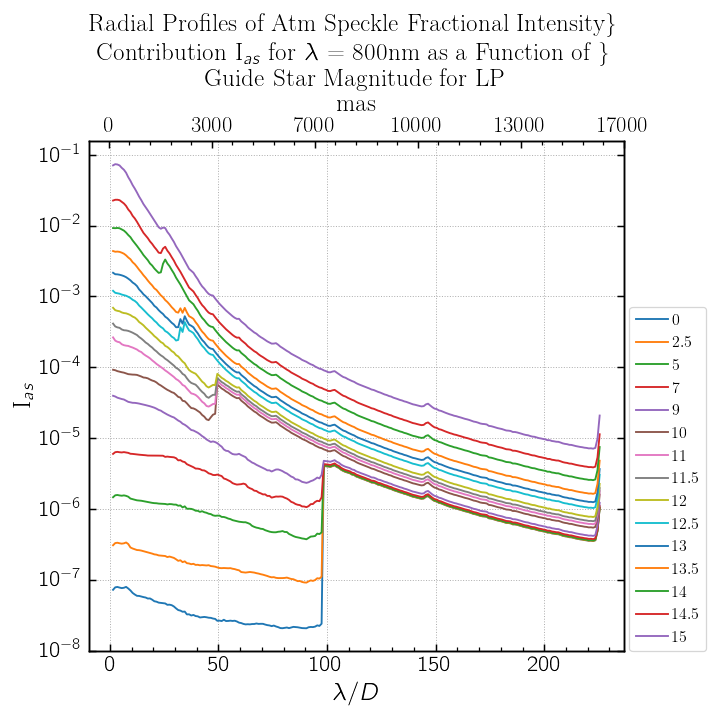

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_58915/113741582.py:37: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_58915/113741582.py:38: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('Ias_radprofiles_lp.png', bbox_inches='tight')


In [84]:
os.system('ls GMagAO-X-noise/contrast*lp_radprof* > list')
with open('list') as f:
    radprofs = f.read().splitlines()

%matplotlib notebook
plt.figure(figsize=(8,8))
for m in starmags_str:
    Ias = pd.read_table(f'GMagAO-X-noise/contrast_{m}_lp_radprof.dat', 
                        delim_whitespace=True, names=['lod','Ias'])
    plt.plot(Ias['lod'],Ias['Ias'], label=str(m))
xticks = plt.xticks()[0][1:]

plt.gca().set_yscale('log')
plt.legend(loc=(1.01,0), fontsize=13)

ax1 = plt.gca()
ax2 = ax1.twiny()
from matplotlib.ticker import FormatStrFormatter
#ax2.xaxis.set_major_formatter(FormatStrFormatter('{x:,.0f}'))
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(xticks)
lod = (0.2063 * 0.8 / 24.5)*1000
ticklabels = xticks * lod
ticklabels = np.round(ticklabels,decimals=-2)
ticklabels = [str(t).replace('.','') for t in ticklabels]
ticklabels[0] = '0'
ax2.set_xticklabels(ticklabels)

plt.title(r'Radial Profiles of Atm Speckle Fractional Intensity\
            Contribution I$_{as}$ for $\lambda$ = 800nm as a Function of \
            Guide Star Magnitude for LP')
ax1.set_xlabel(r'$\lambda/D$')
ax1.set_ylabel(r'I$_{as}$')
ax2.set_xlabel('mas')
ax1.grid(ls=':')

plt.tight_layout()
plt.savefig('Ias_radprofiles_lp.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


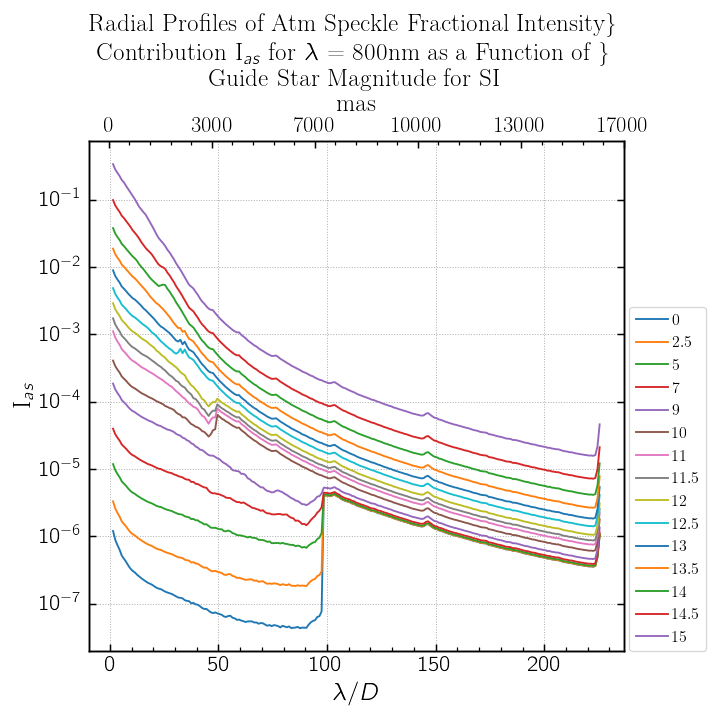

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_58915/2375084915.py:33: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_58915/2375084915.py:34: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('Ias_radprofiles_si.png', bbox_inches='tight')


In [85]:
%matplotlib notebook
plt.figure(figsize=(8,8))
for m in starmags_str:
    Ias = pd.read_table(f'GMagAO-X-noise/contrast_{m}_si_radprof.dat', 
                        delim_whitespace=True, names=['lod','Ias'])
    plt.plot(Ias['lod'],Ias['Ias'], label=str(m))
xticks = plt.xticks()[0][1:]

plt.gca().set_yscale('log')
plt.legend(loc=(1.01,0), fontsize=13)

ax1 = plt.gca()
ax2 = ax1.twiny()
from matplotlib.ticker import FormatStrFormatter
#ax2.xaxis.set_major_formatter(FormatStrFormatter('{x:,.0f}'))
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(xticks)
lod = (0.2063 * 0.8 / 24.5)*1000
ticklabels = xticks * lod
ticklabels = np.round(ticklabels,decimals=-2)
ticklabels = [str(t).replace('.','') for t in ticklabels]
ticklabels[0] = '0'
ax2.set_xticklabels(ticklabels)

plt.title(r'Radial Profiles of Atm Speckle Fractional Intensity\
            Contribution I$_{as}$ for $\lambda$ = 800nm as a Function of \
            Guide Star Magnitude for SI')
ax1.set_xlabel(r'$\lambda/D$')
ax1.set_ylabel(r'I$_{as}$')
ax2.set_xlabel('mas')
ax1.grid(ls=':')

plt.tight_layout()
plt.savefig('Ias_radprofiles_si.png', bbox_inches='tight')

# 2D Ias lookup

<IPython.core.display.Javascript object>


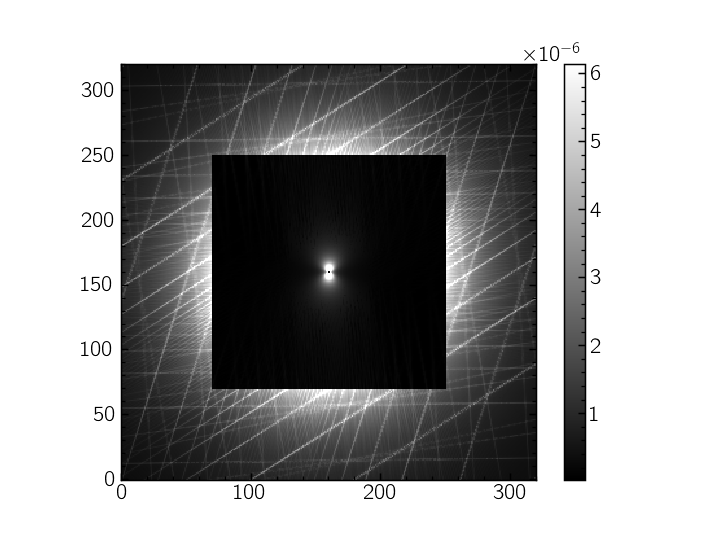

In [163]:
def GetNoiseModelMap(guidestarmag, wfc):
    from astropy.io import fits
    IasMap = fits.getdata(f'GMagAO-X-noise/contrast_{guidestarmag}_{wfc}.fits')
    return IasMap

from astropy.visualization import MinMaxInterval, ZScaleInterval, ImageNormalize

guidestarmag = 0
wfc = 'si'
IasMap = GetNoiseModelMap(guidestarmag, wfc)
center = [0.5*(IasMap.shape[0]-1),0.5*(IasMap.shape[1]-1)]

norm = ImageNormalize(IasMap, interval=ZScaleInterval())


%matplotlib notebook
plt.imshow(IasMap, norm=norm)
plt.colorbar()
#plt.scatter(*center)

In [131]:
IasMap.shape

(321, 321)

In [132]:
sep = 220 # lod

pa = 270 # deg

dx = sep * np.cos(np.radians(pa + 90))
dy = sep * np.sin(np.radians(pa + 90))
print(int(np.round(center[0]+dx, decimals=0)),int(np.round(center[1]+dy,decimals=0)))
print(IasMap[int(np.round(center[0]+dx, decimals=0)),int(np.round(center[1]+dy,decimals=0))])
print(IasMap[-20,30])

%matplotlib notebook
plt.imshow(IasMap)
plt.scatter(*center)
plt.scatter(np.round(center[0]+dx, decimals=0),np.round(center[1]+dy,decimals=0))

380 160


IndexError: index 380 is out of bounds for axis 0 with size 321

In [123]:
IasMap[int(np.round(center[0]+dx, decimals=0)),int(np.round(center[1]+dy,decimals=0))]
IasMap[int(np.round(center[1]+dy, decimals=0)),int(np.round(center[0]+dx,decimals=0))]

1.8981166455170905e-06

In [135]:
def GetNoiseModelMap(guidestarmag, wfc):
    from astropy.io import fits
    IasMap = fits.getdata(f'GMagAO-X-noise/contrast_{guidestarmag}_{wfc}.fits')
    return IasMap

def GetIas(guidestarmag, wfc, sep, pa):
    ''' For a given guide star magnitude and wfc, look up the value of the atmospheric speckle
        contribution I_as (Males et al. 2021 eqn 6) at a given separation and position angle
        
    Args:
        guidestarmag (flt or str): Guide star magnitude. Must be: ['0', '2.5', '5', '7', '9', '10', '11',
                        '11.5', '12', '12.5', '13','13.5', '14', '14.5', '15']
        wfc (str): wavefront control set up.  Either linear predictive control "lp" or simple integrator "si"
        sep (flt): separation in lambda/D
        pa (flt): position angle in degrees
    
    Returns:
        flt: value of I_as at that location
    '''
    IasMap = GetNoiseModelMap(guidestarmag, wfc)
    center = [0.5*(IasMap.shape[0]-1),0.5*(IasMap.shape[1]-1)]
    dx = sep * np.cos(np.radians(pa + 90))
    dy = sep * np.sin(np.radians(pa + 90))
    if int(np.round(center[0]+dx, decimals=0)) < 0:
        return np.nan
    try:
        return IasMap[int(np.round(center[0]+dx, decimals=0)),int(np.round(center[1]+dy,decimals=0))]
    except IndexError:
        return np.nan

guidestarmag = 0
wfc = 'lp'
sep = 100 # lod
pa = 90 # deg

GetIas(guidestarmag, wfc, sep, pa)

3.974730868600752e-06

In [150]:
def GetSNRSpeckleLimited(guidestarmag, wfc, sep, pa, Cp, deltat, wavelength, tau_as = 0.02):
    '''For a given guide star magnitude, wfc, and planet-star contrast, get the SNR
        in the speckle-limited regime (Eqn 10 of Males et al. 2021)
        at a given separation and position angle.
        
    Args:
        guidestarmag (flt or str): Guide star magnitude. Must be: ['0', '2.5', '5', '7', '9', '10', '11',
                        '11.5', '12', '12.5', '13','13.5', '14', '14.5', '15']
        wfc (str): wavefront control set up.  Either linear predictive control "lp" or simple integrator "si"
        sep (flt): separation in lambda/D
        pa (flt): position angle in degrees
        Cp (flt): planet-star contrast
        deltat (flt): observation time in sec
        wavelength (astropy units object):  central wavelength of filter band
        tau_as (flt): lifetime of atmospheric speckles in sec. Default = 0.02, ave tau_as for 24.5 m telescope
                from Males et al. 2021 Fig 10
    
    Returns:
        flt: value of I_as at that location
    '''
    Ias = GetIas(guidestarmag, wfc, sep, pa)
    Ias = Ias * (((0.8*u.um/wavelength).decompose())**2).value
    if np.isnan(Ias):
        raise Exception('Sep/PA is outside noise map boundaries')
    else:
        SNR = (Cp * np.sqrt(deltat)) / (Ias * np.sqrt(tau_as))
    return SNR
        
guidestarmag = 0
wfc = 'si'
sep = 150 # lod
pa = 90 # deg
Cp = 1e-6
deltat = 100 # sec
wavelength = 500*u.nm

GetSNRSpeckleLimited(guidestarmag, wfc, sep, pa, Cp, deltat, wavelength, tau_as = 0.02)

19.21496434054486

<IPython.core.display.Javascript object>


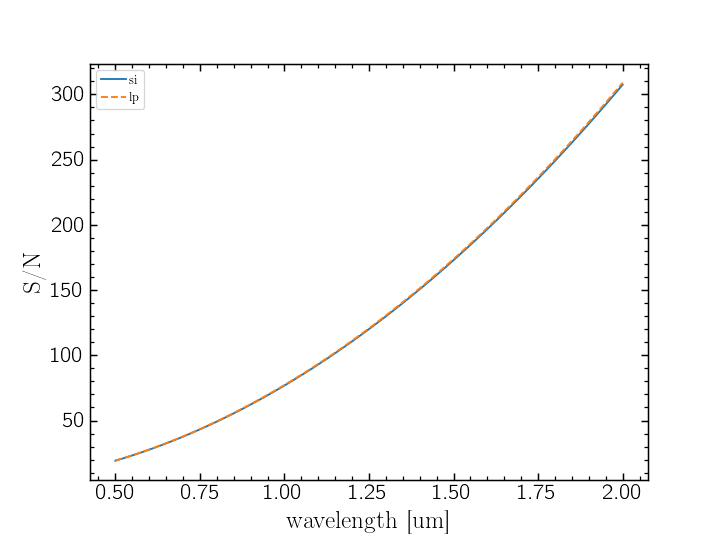

Text(0, 0.5, 'S/N')

In [157]:
guidestarmag = 0
sep = 150 # lod
pa = 90 # deg
Cp = 1e-6
deltat = 100 # sec

%matplotlib notebook
ws = np.linspace(0.5,2.0,100)
snrs = []
for w in ws:
    snrs.append(GetSNRSpeckleLimited(guidestarmag, 'si', sep, pa, Cp, deltat, w*u.um, tau_as = 0.02))
    
plt.plot(ws, snrs, label='si')
snrs = []
for w in ws:
    snrs.append(GetSNRSpeckleLimited(guidestarmag, 'lp', sep, pa, Cp, deltat, w*u.um, tau_as = 0.02))
plt.plot(ws, snrs, label='lp', ls='--')
plt.legend()
plt.xlabel('wavelength [um]')
plt.ylabel('S/N')

# Planet-Star Contrast